<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/unsupervisedlearning_casestudy_neethumathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('/content/adult_dataset.csv')
data.replace('?', np.nan, inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
data = data.drop(['relationship', 'fnlwgt','capital-gain','capital-loss','hours-per-week','education'], axis=1)

for col in ['occupation', 'native-country', 'age', 'workclass']:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

if 'income' in categorical_cols:
    categorical_cols.remove('income')

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = data[col].clip(lower, upper)

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

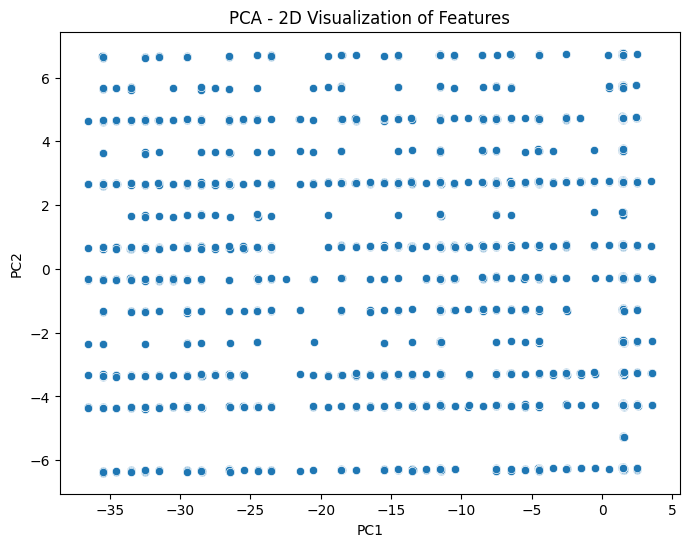

In [ ]:
data_features = data.drop('income', axis=1)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_features)
data_pca_df = pd.DataFrame(data_pca, columns=['PC1','PC2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=data_pca_df)
plt.title('PCA - 2D Visualization of Features')
plt.show()

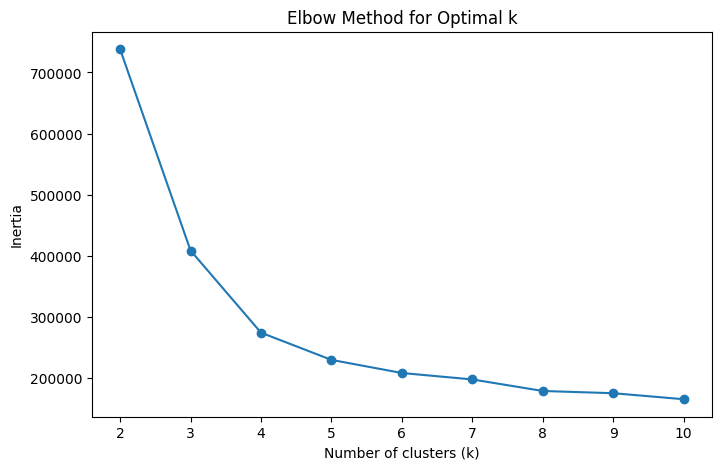

In [ ]:
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_features3_scaled = scaler.fit_transform(data_features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data_features3_scaled)
score_kmeans = silhouette_score(data_features3_scaled, data['Cluster_KMeans'])
print("K-Means Silhouette Score:", score_kmeans)

K-Means Silhouette Score: 0.19034243096479989


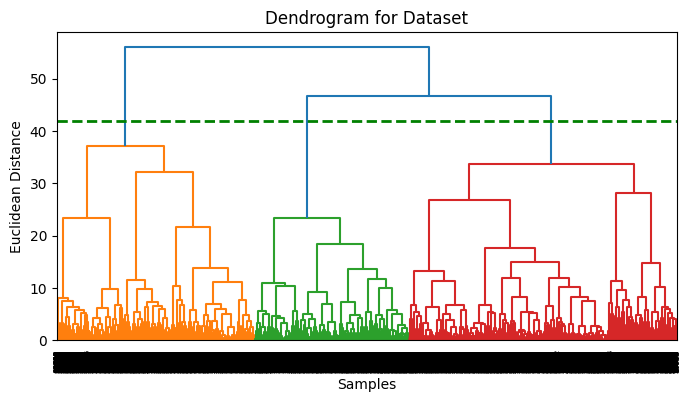

In [ ]:
mergings = linkage(data_features3_scaled, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(mergings)
plt.title('Dendrogram for Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.axhline(y=42, color='green', linestyle='--', linewidth=2)
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster_Agglo'] = agglo.fit_predict(data_features3_scaled)
score_agglo = silhouette_score(data_features3_scaled, data['Cluster_Agglo'])
print("Agglomerative Silhouette Score:", score_agglo)


Agglomerative Silhouette Score: 0.15441157475526682


In [ ]:
db = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = db.fit_predict(data_features3_scaled)
score_db = silhouette_score(data_features3_scaled, data['Cluster_DBSCAN'])
print("DBSCAN Silhouette Score:", score_db)

DBSCAN Silhouette Score: 0.3662894004489671


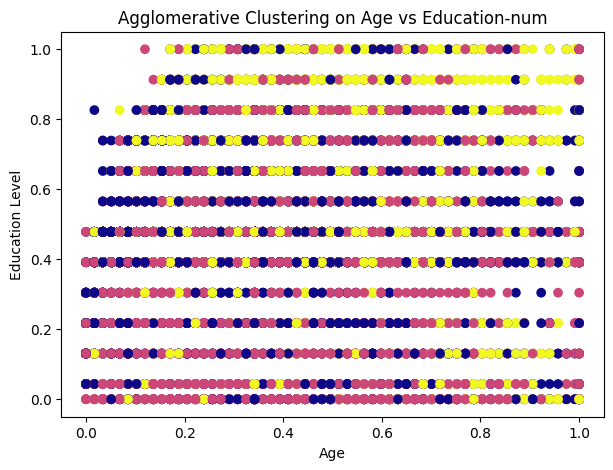

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_Agglo'],
    cmap='plasma'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('Agglomerative Clustering on Age vs Education-num')
plt.show()


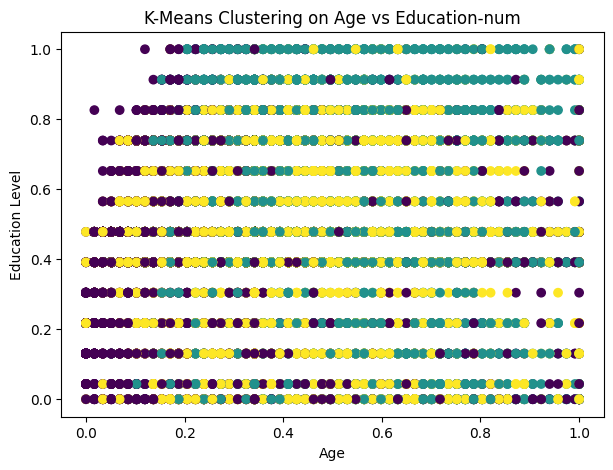

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_KMeans'],
    cmap='viridis'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('K-Means Clustering on Age vs Education-num')
plt.show()

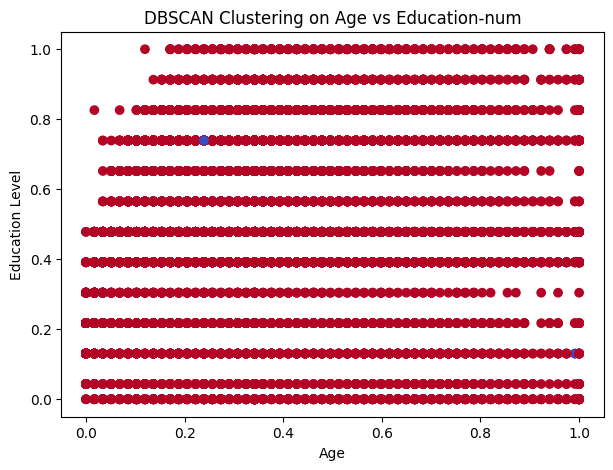

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_DBSCAN'],
    cmap='coolwarm'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('DBSCAN Clustering on Age vs Education-num')
plt.show()

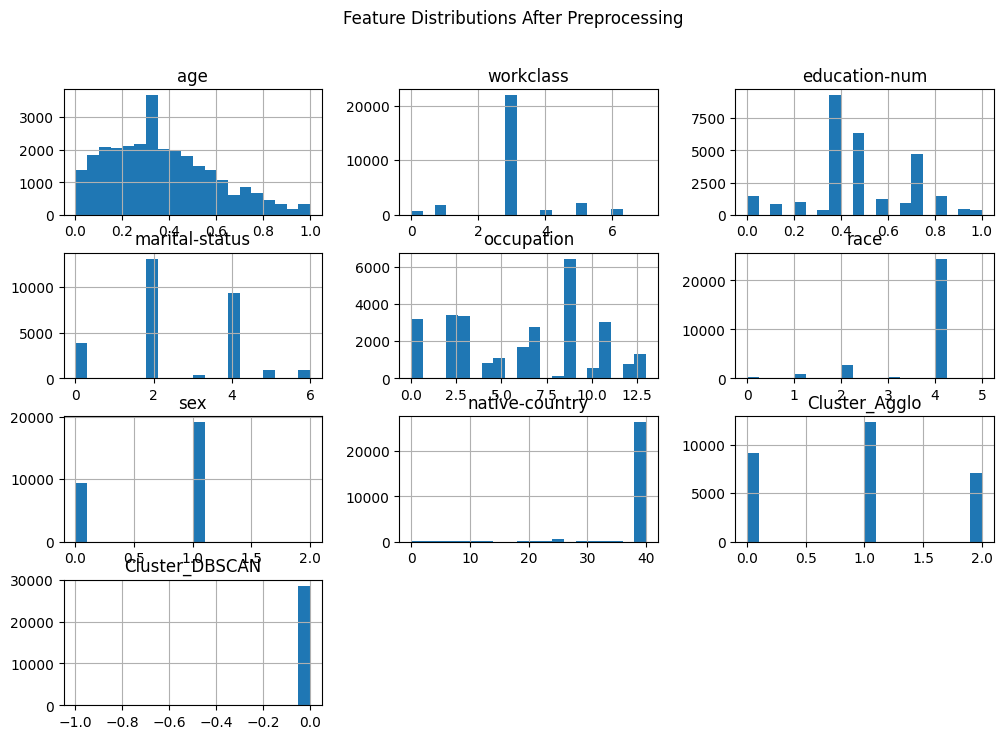

In [ ]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
data[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle('Feature Distributions After Preprocessing')
plt.show()


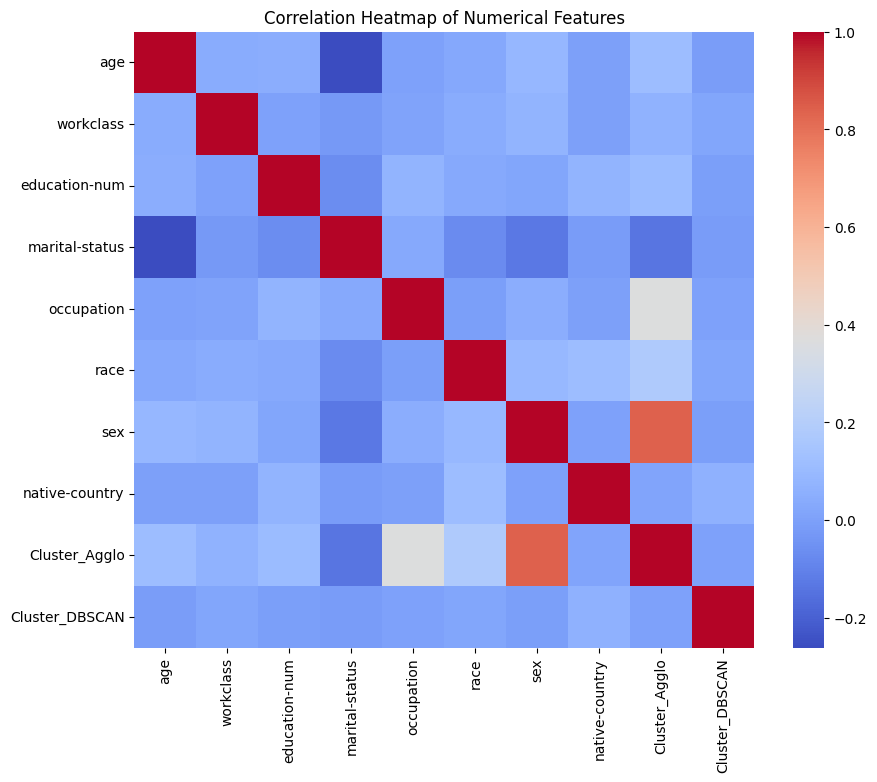

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

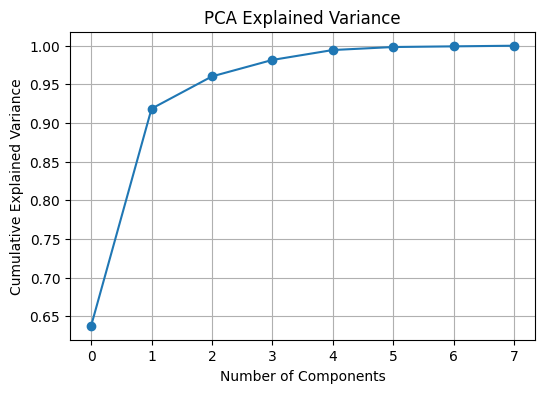

In [ ]:
pca_full = PCA().fit(data_features)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
def cluster_summary(df, cluster_col):
    print(f"\n===== {cluster_col} Summary =====")
    clusters = df[cluster_col].unique()
    for c in sorted(clusters):
        subset = df[df[cluster_col] == c]
        print(f"\nCluster {c} | Count = {len(subset)} | % = {len(subset)/len(df):.2%}")
        print("Mean Age:", subset['age'].mean())
        if 'education-num' in subset.columns:
            print("Mean Education Level:", subset['education-num'].mean())
        if 'workclass' in subset.columns:
            print("Top Workclass:", subset['workclass'].mode()[0])
        if 'occupation' in subset.columns:
            print("Top Occupation:", subset['occupation'].mode()[0])
        if 'sex' in subset.columns:
            print("Gender Distribution:\n", subset['sex'].value_counts(normalize=True))
        if 'native-country' in subset.columns:
            print("Top Country:", subset['native-country'].mode()[0])
cluster_summary(data, 'Cluster_KMeans')
cluster_summary(data, 'Cluster_Agglo')
cluster_summary(data, 'Cluster_DBSCAN')


===== Cluster_KMeans Summary =====

Cluster 0 | Count = 8245 | % = 28.83%
Mean Age: 0.23428962385905988
Mean Education Level: 0.45529042634534767
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex
0    0.54906
1    0.45094
Name: proportion, dtype: float64
Top Country: 38

Cluster 1 | Count = 8949 | % = 31.29%
Mean Age: 0.4687846514866294
Mean Education Level: 0.5378400307053981
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex
1    0.787686
0    0.212314
Name: proportion, dtype: float64
Top Country: 38

Cluster 2 | Count = 11406 | % = 39.88%
Mean Age: 0.38436435464315527
Mean Education Level: 0.47470820087063254
Top Workclass: 3
Top Occupation: 2
Gender Distribution:
 sex
1    0.733123
0    0.266789
2    0.000088
Name: proportion, dtype: float64
Top Country: 38

===== Cluster_Agglo Summary =====

Cluster 0 | Count = 9156 | % = 32.01%
Mean Age: 0.3375554958123766
Mean Education Level: 0.48598210724257795
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex


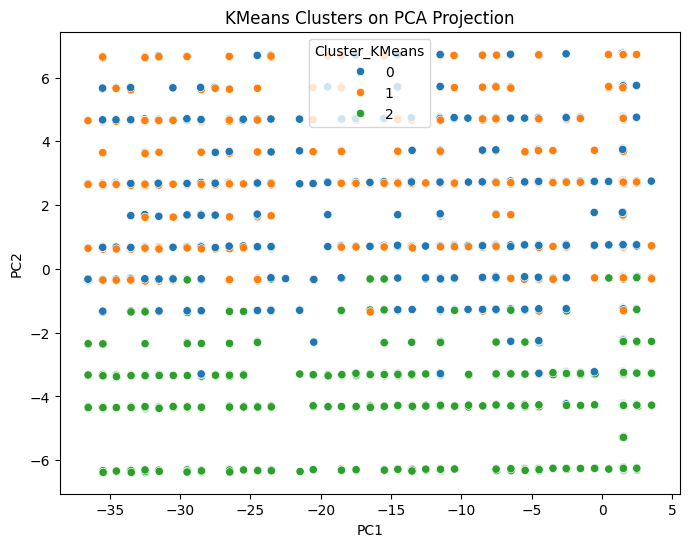

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_KMeans'], data=data_pca_df, palette='tab10')
plt.title('KMeans Clusters on PCA Projection')
plt.show()



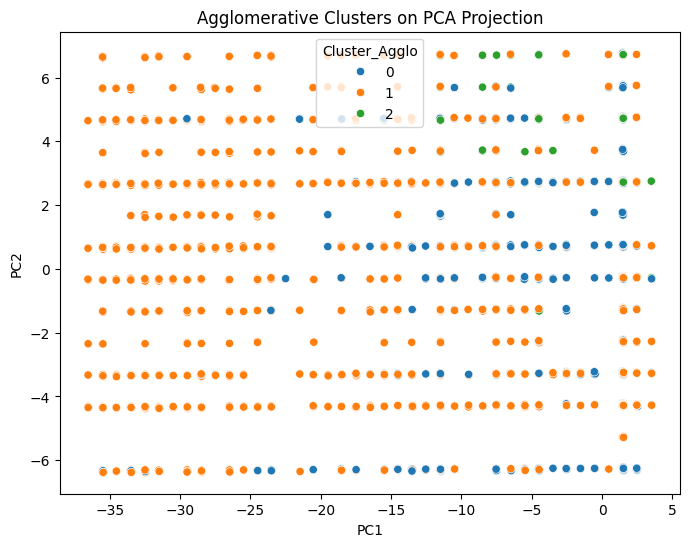

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_Agglo'], data=data_pca_df, palette='tab10')
plt.title('Agglomerative Clusters on PCA Projection')
plt.show()



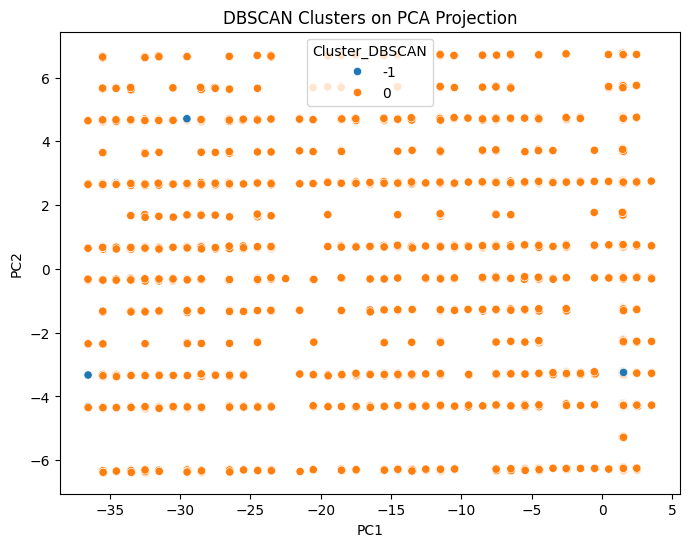

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_DBSCAN'], data=data_pca_df, palette='tab10')
plt.title('DBSCAN Clusters on PCA Projection')
plt.show()

In [ ]:
print("""
Cluster 0: Individuals with lower education and limited occupations
 Upskilling or vocational training programs.

Cluster 1: Middle-level workers with stable jobs and moderate working hours
Tax reform or professional development programs.

Cluster 2: Highly educated and skilled individuals with high work hours
Financial literacy, investment planning, or work-life balance initiatives.""")


Cluster 0: Individuals with lower education and limited occupations
 Upskilling or vocational training programs.

Cluster 1: Middle-level workers with stable jobs and moderate working hours
Tax reform or professional development programs.

Cluster 2: Highly educated and skilled individuals with high work hours
Financial literacy, investment planning, or work-life balance initiatives.


In [ ]:
for c in sorted(data['Cluster_KMeans'].unique()):
    subset = data[data['Cluster_KMeans'] == c]
    print(f"Cluster {c} - Income Distribution:")
    print(subset['income'].value_counts(normalize=True))
    print()


Cluster 0 - Income Distribution:
income
<=50K    0.950273
>50K     0.049727
Name: proportion, dtype: float64

Cluster 1 - Income Distribution:
income
<=50K    0.619734
>50K     0.380266
Name: proportion, dtype: float64

Cluster 2 - Income Distribution:
income
<=50K    0.733976
>50K     0.266024
Name: proportion, dtype: float64

